In [21]:
# moutn google drive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [22]:
# go into the file directory
%cd "/gdrive/MyDrive/datasets/dataset/"
%ls

/gdrive/MyDrive/datasets/dataset
images/  masks/


In [23]:
!pip install nibabel SimpleITK torchmed matplotlib

In [24]:
from matplotlib import pylab as plt
import nibabel as nib
from nibabel import nifti1
from nibabel.viewers import OrthoSlicer3D

In [36]:
# print the header of the file
image = nib.load('./images/coronacases_010.nii.gz')
mask = nib.load('./masks/coronacases_010_mask.nii.gz')
print("Image shape: ", image.shape)
print("Mask shape: ", mask.shape)
print('\n', "#" * 10, " Image header ", "#" * 10, '\n')
print(image.header) # output header information
print('\n', "#" * 10, " Mask header ", "#" * 10, '\n')
print(mask.header) # output header information

Image shape:  (512, 512, 301)
Mask shape:  (512, 512, 301)

 ##########  Image header  ########## 

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 512 512 301   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.        0.683594  0.683594  1.        1.        1.        1.
  1.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       

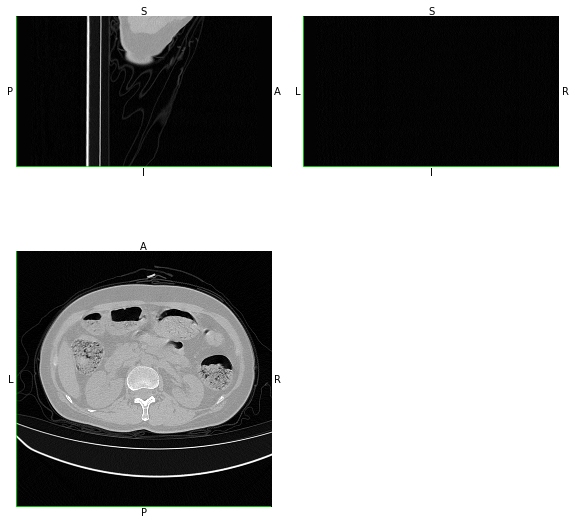

In [26]:
# 3D inspect the file
#shape has four parameters scan.nii.gz
width, height, queue = image.dataobj.shape
OrthoSlicer3D(image.dataobj).show()

In [37]:
# get numpy array out of nibabel object
image_data = image.get_fdata()
mask_data = mask.get_fdata()

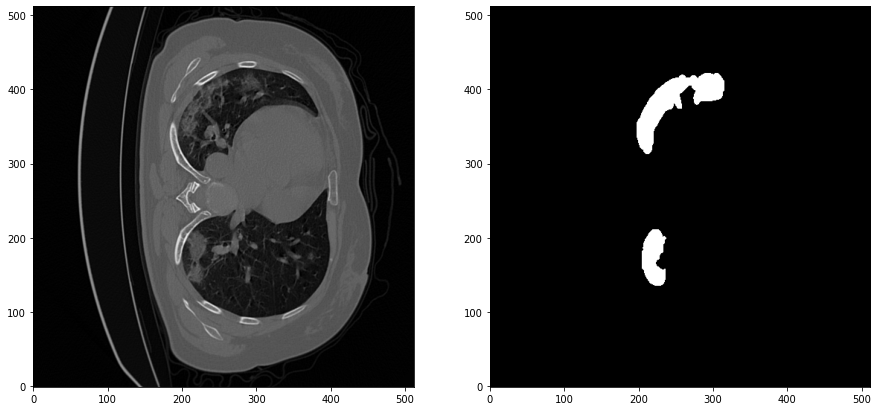

In [28]:
# plot 
fig, axes = plt.subplots(1, 2, figsize=(15, 30))
axes[0].imshow(image_data[:,:,150], cmap="gray", origin="lower")
axes[1].imshow(mask_data[:,:,150], cmap="gray", origin="lower")

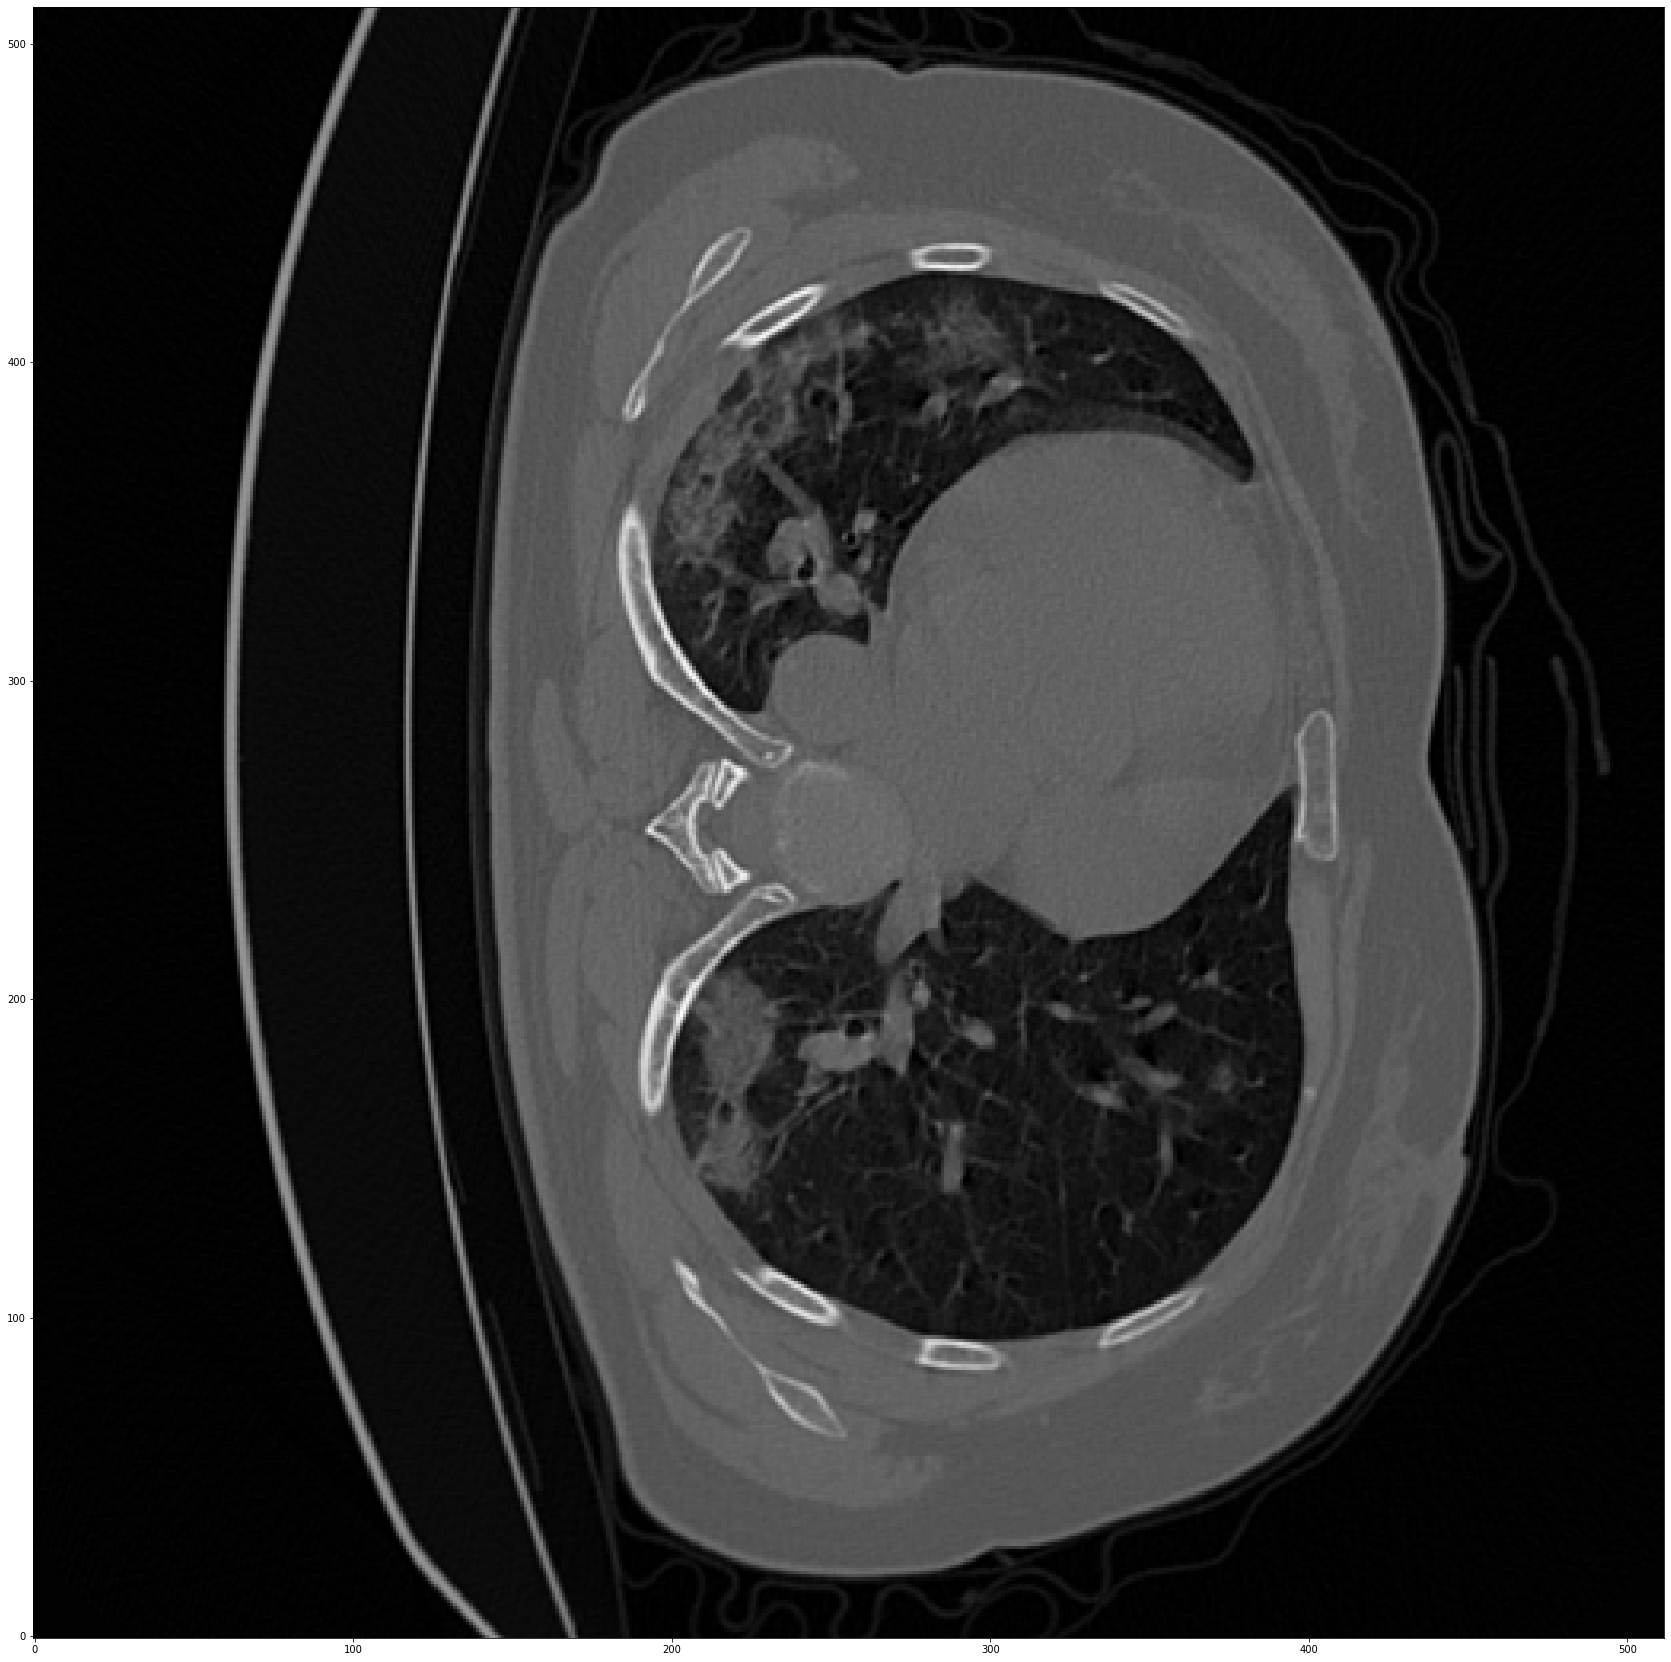

In [40]:
fig, axes = plt.subplots(1, 1, figsize=(35, 30))
axes.imshow(image_data[:,:,150], cmap="gray", origin="lower")

In [29]:
def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices), figsize=(30, 10))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

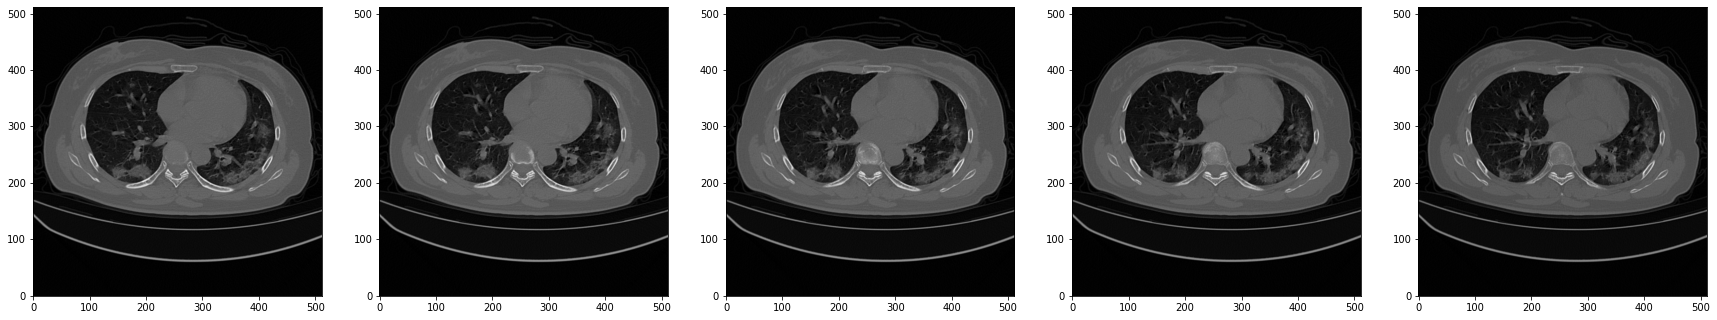

In [30]:
show_slices([image_data[:, :, i] for i in range(150,155)])

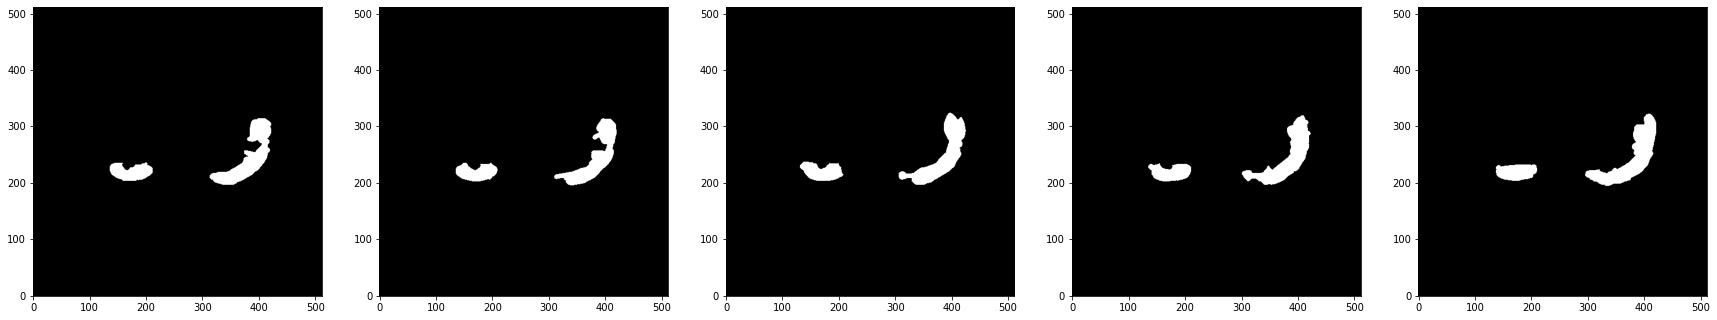

In [31]:
show_slices([mask_data[:, :, i] for i in range(150,155)])

(301, 512, 512)


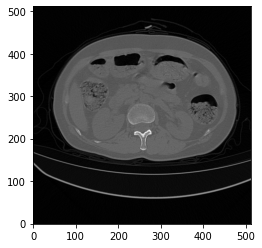

In [32]:
# using SimpleITK library
import SimpleITK as sitk
import matplotlib.pyplot as plt

image = sitk.ReadImage('./images/coronacases_010.nii.gz')
image = sitk.GetArrayFromImage(image)
print(image.shape)
plt.imshow(image[0], cmap="gray", origin="lower")

torch.Size([301, 512, 512])


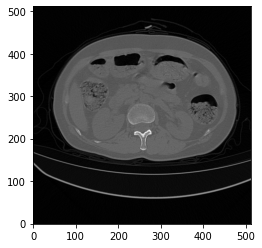

In [33]:
# using torchmed library
import torchmed
image = torchmed.readers.SitkReader('./images/coronacases_010.nii.gz').to_torch()
print(image.shape)
plt.imshow(image[0], cmap="gray", origin="lower")

In [ ]:
# saving using SimpleITK library
import SimpleITK as sitk
import matplotlib.pyplot as plt

image = sitk.ReadImage('./images/coronacases_010.nii.gz')
image = sitk.GetArrayFromImage(image)
out = sitk.GetImageFromArray(image)
sitk.WriteImage(out,'simpleitk_save.nii.gz')

In [ ]:
# saving using nibabel library
import nibabel as nib

image_nib = nib.load('./images/coronacases_010.nii.gz')
header = image_nib.header
affine = image_nib.affine
img = nib.Nifti1Image(image_nib.get_fdata(), affine, header)
nib.save(img, 'saved_file.nii')